In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# 타이타닉 train 데이터와 test 데이터를 파일에서 로드 (데이터프레임 구성)
titanic_df = pd.read_csv("data/train.csv")
test_df    = pd.read_csv("data/test.csv")

# train 데이터프레임 확인
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()
print("------------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fa

In [4]:
# 분석과 예측에 사용되지 않는 불필요한 컬럼 제거
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

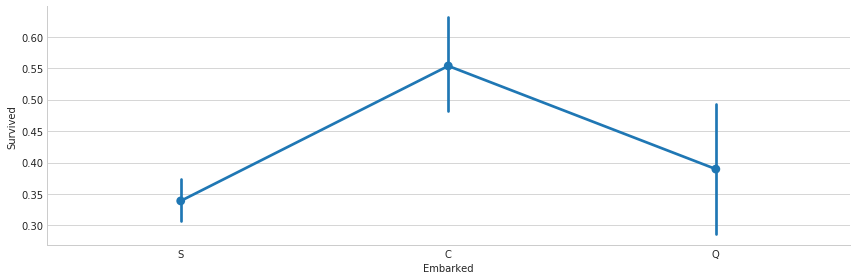

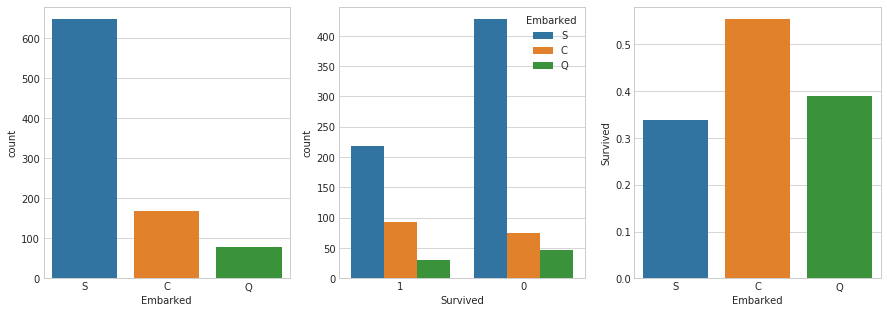

In [5]:
# Embarked

# train 데이터에서 승선 정보의 missing value를 가장 승선이 많이 발생한 S로 채움
titanic_df["Embarked"] = titanic_df["Embarked"].fillna('S')

# plot
sns.factorplot('Embarked', 'Survived', data=titanic_df, size=4, aspect=3)

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

#sns.factorplot('Embarked', data=titanic_df, kind='count', order=['S','C','Q'], ax=axis1)
#sns.factorplot('Survived', hue="Embarked", data=titanic_df, kind='count', order=[1,0], ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue='Embarked', data=titanic_df, order=[1,0], ax=axis2)

# 승선 위치에 따라 생존한 승객들 그룹화하여 카운팅
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc, order=['S','C','Q'], ax=axis3)

# 예측에 승선 위치 컬럼을 고려해보고 S 컬럼은 제거하고 C, Q 컬럼은 생존에 좋은 확률을 보이므로 남겨둔다.
# Pandas의 get_dummies 함수를 통해 S,C,Q와 같이 문자로 되어 있던 Embakred 컬럼을 각 승선 위치별로 컬럼으로 만들고
# 값은 생존 했다, 안했다를 의미하는 1, 0 값으로 변환하여 기존 tranin 테이블과 test 테이블에 join을 수행한다.
# Embarked 컬럼은 이제 예측에 그리 도움이 되는거 같지 않아 보이니 컬럼을 제거한다.
embark_dummies_titanic = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

In [6]:
#titanic_df.head()

print(titanic_df["Fare"][titanic_df["Survived"] == 0])

0        7.2500
4        8.0500
5        8.4583
6       51.8625
7       21.0750
12       8.0500
13      31.2750
14       7.8542
16      29.1250
18      18.0000
20      26.0000
24      21.0750
26       7.2250
27     263.0000
29       7.8958
30      27.7208
33      10.5000
34      82.1708
35      52.0000
37       8.0500
38      18.0000
40       9.4750
41      21.0000
42       7.8958
45       8.0500
46      15.5000
48      21.6792
49      17.8000
50      39.6875
51       7.8000
         ...   
844      8.6625
845      7.5500
846     69.5500
847      7.8958
848     33.0000
850     31.2750
851      7.7750
852     15.2458
854     26.0000
859      7.2292
860     14.1083
861     11.5000
863     69.5500
864     13.0000
867     50.4958
868      9.5000
870      7.8958
872      5.0000
873      9.0000
876      9.8458
877      7.8958
878      7.8958
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
888     23.4500
890      7.7500
Name: Fare, Length: 549,

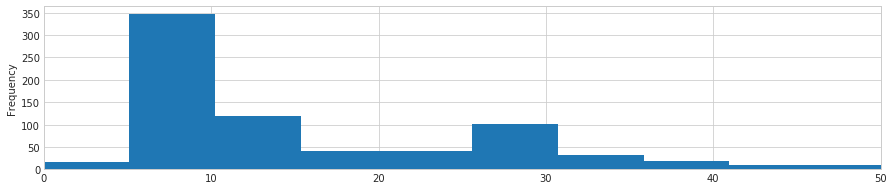

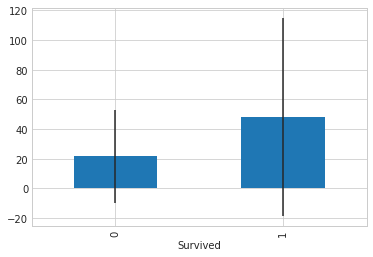

In [7]:
# Fare

# test 데이터프레임의 Fare 컬럼에서 비어있는 부분을 Fare의 중간값으로 채움
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


# Fare 컬럼은 float 타입으로 되어 있는데 이를 int 타입으로 변환
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# 생존한 승객과 죽은 승객의 Fare 값 구분
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# 생존한 승객과 죽은 승객의 Fare 평균과 표준편차 값 획득
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


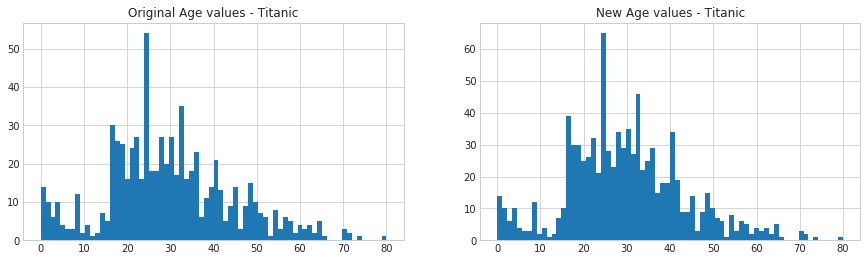

In [8]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# train 데이터프레임에서 Age 컬럼의 평균과 표준편차, 비어있는 항목의 수 획득
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# test 데이터프레임에서 Age 컬럼의 평균과 표준편차, 비어있는 항목의 수 획득
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# (mean - std)과 (mean + std) 사이의 랜덤 숫자 생성
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# Age 컬럼의 모든 null 값을 drop하고, 존재하는 값은 int 타입으로 변환
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# NaN 값을 위에서 생성한 랜덤 숫자로 변환
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# Age 컬럼의 값들을 int 타입으로 변환
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis2)

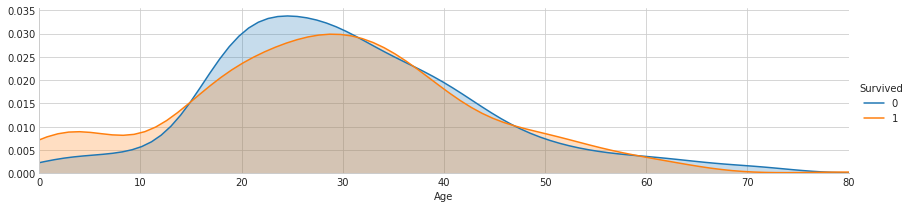

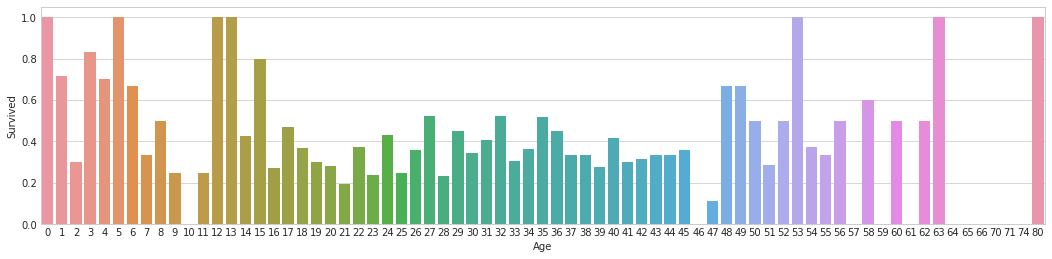

In [9]:
# .... 계속해서 plot Age 컬럼

# 나이별로 생존 여부 획득
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

# 나이별로 생존한 승객들 평균
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

In [10]:
# Cabin
# 이 컬럼에는 NaN Value들이 너무 많기 때문에 예측에 유용하지 않으므로 drop 한다.
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0,0,'With Family'), Text(0,0,'Alone')]

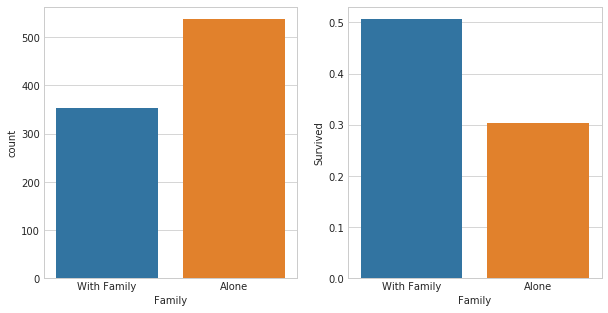

In [11]:
# Family

# 함께 탑승한 것을 의미하는 Parch와 SibSp라는 컬럼이 존재하는데 두 값을 합산하여 Family라는 하나의 컬럼으로 사용한다. 
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# 기존의 Parch와 SibSp 컬럼은 필요 없으므로 drop
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# 가족이 있는지 여부에 따라 구분하여 그래프화
# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# 가족이 있는지 여부에 따라 생존 여부 그래프화
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

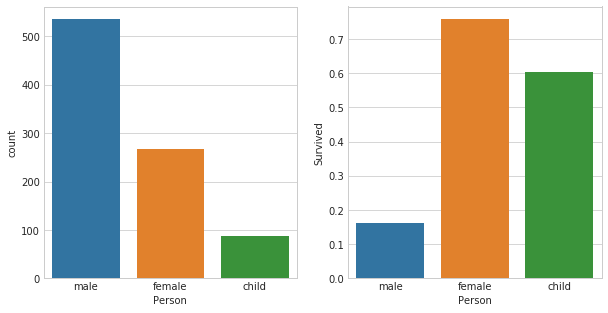

In [12]:
# Sex

# 수치를 살펴보면 16세 미만의 어린이들이 생존 확률이 높았다.
# 그러므로 성별 분류 시에 남자, 여자, 어린이로 분류하도록 한다.
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# 남자, 여자, 어린이 컬럼을 생성할 것이므로 기존의 성별 컬럼은 drop한다.
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# Person 컬럼을 dummy 값으로 생성한 후 가장 생존 확률이 낮은 성별인 Male 컬럼을 제거한다.
# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

# 데이터프레임에 Person 컬럼을 dummy화 한 값 머지
titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# Person 컬럼을 사용하여 남자, 여자, 어린이의 생존 숫자 그래프화
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

# 이제 성별에 대한 생존 여부는 Person 컬럼 대신 Child, Female을 사용하므로 Person은 drop
titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

In [13]:
titanic_df.head()

,Survived,Pclass,Age,Fare,C,Q,Family,Child,Female
0,0,3,22,7,0,0,1,0,0
1,1,1,38,71,1,0,1,0,1
2,1,3,26,7,0,0,0,0,1
3,1,1,35,53,0,0,1,0,1
4,0,3,35,8,0,0,0,0,0


,Survived,Age,Fare,C,Q,Family,Child,Female,Class_1,Class_2
0,0,22,7,0,0,1,0,0,0,0
1,1,38,71,1,0,1,0,1,1,0
2,1,26,7,0,0,0,0,1,0,0
3,1,35,53,0,0,1,0,1,1,0
4,0,35,8,0,0,0,0,0,0,0


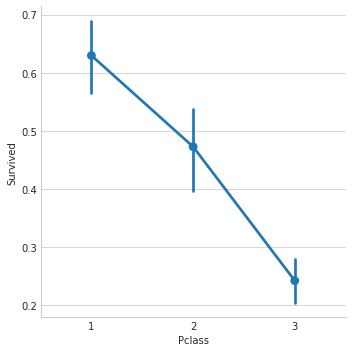

In [14]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

# Pclass 컬럼을 dummy 값으로 변환하고 가장 생존 승객이 적은 Class_3 컬럼은 제거
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

# 이제 선실 등급에 따른 생존 여부는 Class_1,2 컬럼을 사용하므로 기존 Pclass 컬럼은 drop
titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

# dummy값 머지
titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

titanic_df.head()

In [15]:
print(titanic_df["Survived"])

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [16]:
# 결과값에 해당하는 Survived 컬럼을 제거하여 학습용 데이터를 X_train에 저장
# 결과값에 해당하는 Survived 컬럼만을 추출하여 Y_train에 저장
# 각 알고리즘을 통해 X,Y train 데이터 프레임으로 학습을 수행하여 X_test 데이터셋에 포함된 예측용 데이터를 검증
X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [17]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.81144781144781142

In [18]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

0.85072951739618408

In [19]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.96296296296296291

In [20]:
# KNN

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

knn.score(X_train, Y_train)

0.83052749719416386

In [21]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

gaussian.score(X_train, Y_train)

0.76318742985409649

In [22]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Age,-0.022097
1,Fare,0.001012
2,C,0.607179
3,Q,0.295103
4,Family,-0.283638
5,Child,1.976618
6,Female,2.794697
7,Class_1,2.000813
8,Class_2,1.125275
